Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell.

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Mark Yamakaitis"

# Sod's test problems

Sod's test problems are standard benchmarks used to assess the accuracy of numerical solvers. The tests use a classic example of one-dimensional compressible flow: the shock-tube problem. Sod (1978) chose initial conditions and numerical discretization parameters for the shock-tube problem and used these to test several schemes, including Lax-Wendroff and MacCormack's. Since then, many others have followed Sod's example and used the same tests on new numerical methods.

The shock-tube problem is so useful for testing numerical methods because it is one of the few problems that allows an exact solution of the Euler equations for compressible flow.

This notebook complements the previous lessons of the course module [_"Riding the wave: convection problems"_](https://github.com/numerical-mooc/numerical-mooc/tree/master/lessons/03_wave) with Sod's test problems as an independent coding exercise. We'll lay out the problem for you, but leave important bits of code for you to write on your own. Good luck!

## What's a shock tube?

A shock tube is an idealized device that generates a one-dimensional shock wave in a compressible gas. The setting allows an analytical solution of the Euler equations, which is very useful for comparing with the numerical results to assess their accuracy. 

Picture a tube with two regions containing gas at different pressures, separated by an infinitely-thin, rigid diaphragm. The gas is initially at rest, and the left region is at a higher pressure than the region to the right of the diaphragm. At time $t = 0.0 s$, the diaphragm is ruptured instantaneously.  

What happens?  

You get a shock wave.  The gas at high pressure, no longer constrained by the diaphragm, rushes into the lower-pressure area and a one-dimensional unsteady flow is established, consisting of:

* a shock wave traveling to the right
* an expansion wave traveling to the left
* a moving contact discontinuity

The shock-tube problem is an example of a *Riemann problem* and it has an analytical solution, as we said. The situation is illustrated in Figure 1.

![shocktube](shocktube.png)
<center> Figure 1: The shock-tube problem. </center>

## The Euler equations

The Euler equations govern the motion of an inviscid fluid (no viscosity). They consist of the conservation laws of mass and momentum, and often we also need to work with the energy equation. 

Let's consider a 1D flow with velocity $u$ in the $x$-direction. The Euler equations for a fluid with density $\rho$ and pressure $p$ are:

$$
\begin{cases}
    &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 \\
    &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p)=0
\end{cases}
$$

... plus the energy equation, which we can write in this form:

$$
\begin{equation}
\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)=0
\end{equation}
$$

where $e_T=e+u^2/2$ is the total energy per unit mass, equal to the internal energy plus the kinetic energy (per unit mass).

Written in vector form, you can see that the Euler equations bear a strong resemblance to the traffic-density equation that has been the focus of this course module so far. Here is the vector representation of the Euler equation:

$$
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}
$$

The big difference with our previous work is that the variables $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ are *vectors*.  If you review the [Phugoid Full Model](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_03_PhugoidFullModel.ipynb) lesson, you will recall that we can solve for several values at once using the vector form of an equation.  In the Phugoid Module, it was an ODE—now we apply the same procedure to a PDE.  

Let's take a look at what $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ consist of.

## The conservative form

Many works in the early days of computational fluid dynamics in the 1960s showed that using the conservation form of the Euler equations is more accurate for situations with shock waves.  And as you already saw, the shock-tube solutions do contain shocks.

The conserved variables $\underline{\mathbf{u}}$ for Euler's equations are

$$
\begin{equation}
\underline{\mathbf{u}} = \left[
\begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array}
\right]
\end{equation}
$$

where $\rho$ is the density of the fluid, $u$ is the velocity of the fluid and $e_T = e + \frac{u^2}{2}$ is the specific total energy; $\underline{\mathbf{f}}$ is the flux vector:

$$
\begin{equation}
\underline{\mathbf{f}} = \left[
\begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\
\end{array}
\right]
\end{equation}
$$

where $p$ is the pressure of the fluid.

If we put together the conserved variables and the flux vector into our PDE, we get the following set of equations:

$$
\begin{equation}
    \frac{\partial}{\partial t}
    \left[
        \begin{array}{c}
            \rho \\
            \rho u \\
            \rho e_T \\
        \end{array}
    \right] +
    \frac{\partial}{\partial x}
    \left[
        \begin{array}{c}
            \rho u \\
            \rho u^2 + p \\
            (\rho e_T + p) u \\
        \end{array}
    \right] =
    0
\end{equation}
$$

There's one major problem there.  We have 3 equations and 4 unknowns.  But there is a solution!  We can use an equation of state to calculate the pressure—in this case, we'll use the ideal gas law.

## Calculating the pressure

For an ideal gas, the equation of state is

$$
e = e(\rho, p) = \frac{p}{(\gamma -1) \rho}
$$

where $\gamma = 1.4$ is a reasonable value to model air, 

$$
\therefore p = (\gamma -1)\rho e
$$ 

Recall from above that

$$
e_T = e+\frac{1}{2} u^2
$$

$$
\therefore e = e_T - \frac{1}{2}u^2
$$

Putting it all together, we arrive at an equation for the pressure

$$
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
$$

## Flux in terms of $\underline{\mathbf{u}}$

With the traffic model, the flux was a function of traffic density.  For the Euler equations, the three equations we have are coupled and the flux *vector* is a function of $\underline{\mathbf{u}}$, the vector of conserved variables:

$$
\underline{\mathbf{f}} = f(\underline{\mathbf{u}})
$$

In order to get everything squared away, we need to represent $\underline{\mathbf{f}}$ in terms of $\underline{\mathbf{u}}$.
We can introduce a little shorthand for the $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ vectors and define:

$$
\underline{\mathbf{u}} =
\left[
    \begin{array}{c}
        u_1 \\
        u_2 \\
        u_3 \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        \rho \\
        \rho u \\
        \rho e_T \\
    \end{array}
\right]
$$

$$
\underline{\mathbf{f}} =
\left[
    \begin{array}{c}
        f_1 \\
        f_2 \\
        f_3 \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        \rho u \\
        \rho u^2 + p \\
        (\rho e_T + p) u \\
    \end{array}
\right]
$$  

With a little algebraic trickery, we can represent the pressure vector using quantities from the $\underline{\mathbf{u}}$ vector.

$$
p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)
$$

Now that pressure can be represented in terms of $\underline{\mathbf{u}}$, the rest of $\underline{\mathbf{f}}$ isn't too difficult to resolve:

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

## Test conditions

The first test proposed by Sod in his 1978 paper is as follows.  

In a tube spanning from $x = -10 \text{m}$ to $x = 10 \text{m}$ with the rigid membrane at $x = 0 \text{m}$, we have the following initial gas states:

$$
\underline{IC}_L =
\left[
    \begin{array}{c}
        \rho_L \\
        u_L \\
        p_L \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        1.0 \, kg/m^3 \\
        0 \, m/s \\
        100 \, kN/m^2 \\
    \end{array}
\right]
$$

$$
\underline{IC}_R =
\left[
    \begin{array}{c}
        \rho_R \\
        u_R \\
        p_R \\
    \end{array}
\right] =
\left[
    \begin{array}{c}
        0.125 \, kg/m^3 \\
        0 \, m/s \\
        10 \, kN/m^2 \\
    \end{array}
\right]
$$

where $\underline{IC}_L$ are the initial density, velocity and pressure on the left side of the tube membrane and $\underline{IC}_R$ are the initial density, velocity and pressure on the right side of the tube membrane.  

The analytical solution to this test for the velocity, pressure and density, looks like the plots in Figure 2.

![shock_analytic](shock_tube_.01.png)
<center> Figure 2. Analytical solution for Sod's first test. </center>

## The Richtmyer method

For this exercise, you will use the **Lax-Friedrichs** scheme that we implemented in [lesson 2](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_02_convectionSchemes.ipynb).
But, we will also be using a new scheme called the **Richtmyer** method.
Like the MacCormack method, Richtmyer is a *two-step method*, given by:

$$
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
$$

The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
$$

The first step is like a *predictor* of the solution: if you look closely, you'll see that we are applying a Lax-Friedrichs scheme here. The second step is a *corrector* that applies a leapfrog update. Figure 3 gives a sketch of the stencil for Richtmyer method, where the "intermediate time" $n+1/2$ will require a temporary variable in your code, just like we had in the MacCormack scheme.

![richtmyer](richtmyer.png)
<center> Figure 3. Stencil of Richtmyer scheme. </center>

## Implement your solution (40 points)

---

Your mission, should you wish to accept it, is to calculate the pressure, density and velocity along the shock tube at time $t = 0.01 s$ using the Godunov method with the Lax-Friedrichs flux treatment **and** the Richtmyer method as shown above. Good luck!

Code parameters to use:

* Number of discrete points along the 1D domain: `nx = 81` (which gives `dx = 0.25` for a domain of length 20).
* Time-step size: `dt = 0.0002`.
* Heat capacity ratio: `gamma = 1.4`.

Implement your solution in this section.
You can use as many code cells as you want.

In [36]:
#-------- Import libraries --------
import numpy as np
import matplotlib.pyplot as pyp
from copy import deepcopy

In [125]:
#-------- Write code --------
def cSound(gamma, Rspecific, TempK):
    return np.sqrt(gamma*Rspecific*TempK)

class ShockTube:
    def __init__(self, N, Xi, Xe, Xdiaphragm, P0, R0, Ps, Rs, gamma):
        self.X  = np.linspace(Xi, Xe, N)
        self.Xdiaphragm = Xdiaphragm
        self.dx = (Xi-Xe)/(N-1)
        self.U  = np.empty((3, N), dtype=np.float64)
        self.F  = np.empty((3, N), dtype=np.float64)
        
        self.U_RM = np.empty((3,(N-1)), dtype=np.float64)
        self.F_RM = np.empty((3,(N-1)), dtype=np.float64)
        
        self.gamma = gamma
        self.gm1 = self.gamma - 1
        
        self.t = 0
        
        self.U[0, self.X < Xdiaphragm] = R0
        self.U[0, self.X >= Xdiaphragm] = Rs
        
        self.U[1] = 0 #initial velocity = 0, therefore momentum = 0
        
        e0 = P0/((self.gm1)*R0)
        es = Ps/((self.gm1)*Rs)
        self.U[2, self.X < Xdiaphragm] = R0*e0
        self.U[2, self.X >= Xdiaphragm] = Rs*es
        
    def BC(self, Flux):
        # Apply fluxes to boundary cells
        self.U[:, 0] += (dt/self.dx) * (Flux[:,0] - 0) #Flux at 1/2 - 0 flux at -1/2
        self.U[:,-1] += (dt/self.dx) * (0 - Flux[:,-1]) # 0 Flux at N + 1/2 - flux at N - 1/2
        
        # Velocity = 0 at boundary cells
        # There is a momentum flux which enforces this bc the walls of the tube can exert a pressure
        self.U[1, 0] = 0
        self.U[1,-1] = 0

        
    def f(self):
        # caclulates flux of each cell
        self.F[0] = self.U[1]
        self.F[1] = self.U[1]**2/self.U[0] + self.gm1*(self.U[2] + .5 * (self.U[1]**2/self.U[0]))
        self.F[2] = ((self.U[2] + self.gm1*(self.U[2] - .5*self.U[1]**2/self.U[0]))
                        *self.U[1]**2/self.U[0])
            
    def f_RM(self):
        # caclulates flux for each 1/2 value in Richtmeyer method
        # This is a huge block of duplicate code that I'm ashamed of
        # My folly is to never want to pass entire arrays to functions
        self.F_RM[0] = self.U_RM[1]
        self.F_RM[1] = (1 - .5*self.gm1)*self.U_RM[1]**2/self.U_RM[0] + (self.gm1)*self.U_RM[2]
        self.F_RM[2] = ((self.U_RM[2] + self.gm1*(self.U_RM[2] - .5*self.U_RM[1]**2/self.U_RM[0])) 
                        *self.U_RM[1]**2/self.U_RM[0])
            
    def LaxFriedrichsFlux(self, dt):
        self.f()        
        # Flux at cell boundaries using lax friedrichs
        self.F_LF = .5*(self.F[:,:-1] + self.F[:,1:] - (self.dx / dt)*(self.U[:,1:] - self.U[:,:-1]))
                                # The fact that this ^ this dx/dt is about to be cancelled out annoys me
                                # The code is much more readable like this, but it seems wrong

                
    def GodunovLF(self, dt):
        self.LaxFriedrichsFlux(dt) #calculates flux using 
        self.U[:,1:-1] -= (dt / self.dx)*(self.F_LF[:,1:]-self.F_LF[:,:-1])
        self.BC(self.F_LF) # apply boundary conditions using LF flux
        
                
    def Richtmeyer(self, dt):
        self.f() # calculate flux
        self.U_RM = .5*(self.U[:,1:] - self.U[:,:-1]) - (dt/(2*self.dx)) * (self.F[:,1:] - self.F[:,:-1])
        # The u now has the values for between the cells
        # self.BC_RM()
        self.f_RM()
        
        self.U[:,1:-1] -= (dt/self.dx)*(self.F_RM[:,1:] - self.F_RM[:,:-1])
        self.BC(self.F_RM)
        
    def Solve_LF(self, dt, tlim):
        steps = int(np.ceil(tlim / dt))
        for n in range(steps):
            self.GodunovLF(dt)
            self.t += dt     

            
    def Solve_RM(self, dt, tlim):
        steps = int(np.ceil(tlim / dt))
        for n in range(steps):
            self.Richtmeyer(dt)
            self.t += dt
            
    
    def Primitives(self, R = 287):
        u = self.U[1] / self.U[0]
        rho = self.U[0]
        P = self.gm1 * self.U[2]
        T = P / (self.U[0]*R)
        
        return u, rho, P, T
    
    
    def Mach(self, Rgas = 287):
        u, _, _, T = self.Primitives()
        c = cSound(self.gamma, Rgas, T)
        M = u / c
        return M

In [126]:
dt = .0002
Tend = 0.01
Gamma = 1.4

nx = 81

startL = -10
endL = 10
diaphragmL = 0

rL = 1.0 # kg / m^3 Density on left 
PL = 100000 # kPA Pressure on left

rR = 0.125 # kg / m^3 Density on right
PR = 10000 # kPA Pressure on right

Tube_LF = ShockTube(nx, startL, endL, diaphragmL, PL, rL, PR, rR, Gamma)
Tube_RM = ShockTube(nx, startL, endL, diaphragmL, PL, rL, PR, rR, Gamma)

Tube_LF.Solve_LF(dt, Tend)
# Tube_RM.Solve_RM(dt, Tend)

u_LF, rho_LF, P_LF, T_LF = Tube_LF.Primitives()

C:\Users\Mark\AppData\Local\Temp\ipykernel_6580\2460876017.py:46: RuntimeWarning: overflow encountered in multiply
  self.F[2] = ((self.U[2] + self.gm1*(self.U[2] - .5*self.U[1]**2/self.U[0]))
C:\Users\Mark\AppData\Local\Temp\ipykernel_6580\2460876017.py:68: RuntimeWarning: invalid value encountered in subtract
  self.U[:,1:-1] -= (dt / self.dx)*(self.F_LF[:,1:]-self.F_LF[:,:-1])
C:\Users\Mark\AppData\Local\Temp\ipykernel_6580\2460876017.py:61: RuntimeWarning: invalid value encountered in add
  self.F_LF = .5*(self.F[:,:-1] + self.F[:,1:] - (self.dx / dt)*(self.U[:,1:] - self.U[:,:-1]))
C:\Users\Mark\AppData\Local\Temp\ipykernel_6580\2460876017.py:61: RuntimeWarning: invalid value encountered in subtract
  self.F_LF = .5*(self.F[:,:-1] + self.F[:,1:] - (self.dx / dt)*(self.U[:,1:] - self.U[:,:-1]))
C:\Users\Mark\AppData\Local\Temp\ipykernel_6580\2460876017.py:45: RuntimeWarning: overflow encountered in square
  self.F[1] = self.U[1]**2/self.U[0] + self.gm1*(self.U[2] + .5 * (self.U[1]*

In [127]:
Tube_LF = ShockTube(nx, startL, endL, diaphragmL, PL, rL, PR, rR, Gamma)
Tube_LF.f()
Tube_LF.F[0];

In [128]:
Tube_LF.LaxFriedrichsFlux(dt)
Tube_LF.F_LF[1];

## Assessment (80 points)

---

Answer questions in this section.


* **Q1 (10 points):** Plot the numerical solution of the density, velocity, and pressure at time $t = 0.01 s$ obtained with the Godunov method with the Lax-Friedrichs flux treatment **and** the Richtmyer method.

You should also plot the analytical solution.
The analytical solution can be obtained using the function `analytical_solution` from the Python file `sod.py` (located in the same folder than the Jupyter Notebook).
To import the function in your Notebook, use `from sod import analytical_solution`.
You can use `help(analytical_solution)` to see how you should call the function.

Create one figure per variable and make sure to label your axes.
(For example, the first figure should contain the numerical solution of the density using both schemes, as well as the analytical solution for the density.)
Make sure to add a legend to your plots.

In [129]:
#-------- Write code --------
from sod import analytical_solution
X = np.linspace(startL, endL, nx)
rho_anal, u_anal, P_anal = analytical_solution(Tend, X, (rL, 0, PL), (rR, 0, PR))

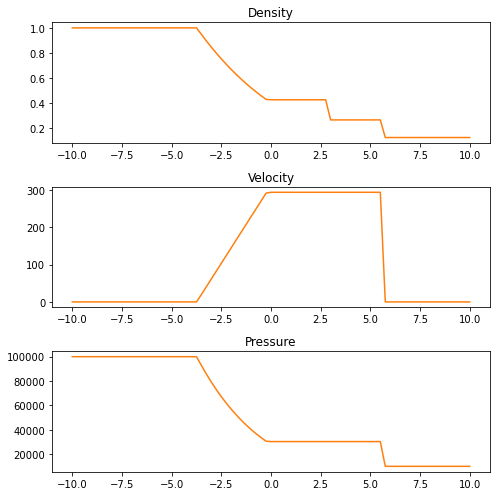

In [130]:
fig, (axr, axu, axP) = pyp.subplots(3, figsize = (7,7), tight_layout = True)

axr.set_title("Density")
axr.plot(Tube_LF.X, rho_LF, label = "Lax Friedrichs")
axr.plot(X, rho_anal)
axu.set_title("Velocity")
axu.plot(Tube_LF.X, u_LF, label = "Lax Friedrichs")
axu.plot(X, u_anal)
axP.set_title("Pressure")
axP.plot(Tube_LF.X, P_LF, label = "Lax Friedrichs")
axP.plot(X, P_anal)

* **Q2 (10 points):** At $t = 0.01 s$, what type of numerical errors to you observe in the numerical solution obtained with the Godunov method with the Lax-Friedrichs flux treatment **and** the Richtmyer method? (Dispersion errors? Diffusion errors? Explain why.)

You should write your answer in the following Markdown cell.

YOUR ANSWER :

* **Q3 (5 points):** At $t = 0.01 s$, what's the $L_2$-norm of the difference between the density obtained with the Richtmyer scheme and the analytical solution?

Hint :
\
       ~ 0.249 

In [ ]:
#-------- Write code --------


* **Q4 (5 points):** At $t = 0.01 s$, what's the $L_2$-norm of the difference between the density obtained with the Lax-Friedrichs scheme and the analytical solution?

Hint :
\
       ~ 0.461

In [ ]:
#-------- Write code --------


* **Q5 (5 points):** At $t = 0.01 s$, what's the value of the density, obtained with Richtmyer scheme, at location $x = 2.5 m$ (in $kg/m^3$)?

Hint :
\
       ~ 0.374 $kg/m^3$

In [ ]:
#-------- Write code --------


* **Q6 (5 points):** At $t = 0.01 s$, what's the value of the velocity, obtained with Lax-Friedrichs scheme, at location $x = 2.5 m$ (in $m/s$)?

Hint :
\
       ~ 281.85 $m/s$

In [ ]:
#-------- Write code --------


* **Q7 (5 points):** At $t = 0.01 s$, what's the absolute difference in the pressure, between the analytical solution and the Richtmyer solution, at location $x = 2.5 m$ (in $N/m^2$)?

Hint :
\
       ~ 64.17 $N/m^2$

In [ ]:
#-------- Write code --------


* **Q8 (5 points):** At $t = 0.01 s$, what's the value of the entropy, obtained with Richtmyer scheme, at location $x = -1.5 m$ (in $J/kg/K$)?

The entropy $s$ is defined as:

$$
s = \frac{p}{\rho^\gamma}
$$

Hint :
\
       ~ 100697.04 $J/kg/K$

In [ ]:
#-------- Write code --------


* **Q9 (5 points):** At $t = 0.01 s$, what's the value of the speed of sound, obtained with Lax-Friedrichs scheme, at location $x = -1.5 m$ (in $m/s$)?

The speed of sound $a$ is defined as:

$$
a = \sqrt{\frac{\gamma p}{\rho}}
$$

Hint :
\
       ~ 349.45 $m/s$

In [ ]:
#-------- Write code --------


* **Q10 (5 points):** At $t = 0.01 s$, what's the value of the Mach number, obtained with Richtmyer scheme, at location $x = -1.5 m$?

**Hint:** the Mach number is the ratio between the velocity and the speed of sound.

Hint :
\
       ~ 0.548 $Mach$

In [ ]:
#-------- Write code --------


## Reference

---

* Sod, Gary A. (1978), "A survey of several finite difference methods for systems of nonlinear hyperbolic conservation laws," *J. Comput. Phys.*, Vol. 27, pp. 1–31 DOI: [10.1016/0021-9991(78)90023-2](http://dx.doi.org/10.1016%2F0021-9991%2878%2990023-2) // [PDF from unicamp.br](http://www.fem.unicamp.br/~phoenics/EM974/TG%20PHOENICS/BRUNO%20GALETTI%20TG%202013/a%20survey%20of%20several%20finite%20difference%20methods%20for%20systems%20of%20nonlinear%20hyperbolic%20conservation%20laws%20Sod%201978.pdf), checked Oct. 28, 2014.